In [192]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
PW = 8
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

from scipy.stats import norm, skew


dir_path = "./Meteorological Data/" 
%matplotlib inline

import os
print(os.listdir(dir_path))

['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv', 'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']


In [201]:
files = ['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv',
         'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']

In [213]:
city = 0
df = pd.read_csv(dir_path + files[city], encoding="utf-8")
df["City"] = files[city].split(" ")[0]

for city in range(1, len(files)):
    
    tdf = pd.read_csv(dir_path + files[city], encoding="utf-8")
    
    #Drop Unnamed Column
    if city in [1,2,4]:
        tdf.drop([tdf.columns[-1]], axis=1, inplace=True)
    
    tdf["City"] = files[city].split(" ")[0]
    df = pd.concat([df, tdf])
        
    
df.set_index(pd.to_datetime(df.Date), inplace=True)
df.drop(["Date","Day"], axis=1, inplace=True)
df["Daily Temperature Variation"] = df[u"Maximum temperature (°C)"] - df[u"Minimum temperature (°C)"]

print(df.columns)
df.head(3)

Index([         u'Minimum temperature (°C)',
                u'Maximum temperature (°C)',
                           u'Rainfall (mm)',
                        u'Evaporation (mm)',
                        u'Sunshine (hours)',
         u'Direction of maximum wind gust ',
       u'Speed of maximum wind gust (km/h)',
               u'Time of maximum wind gust',
                    u'9am Temperature (°C)',
               u'9am relative humidity (%)',
                u'9am cloud amount (oktas)',
                      u'9am wind direction',
                   u'9am wind speed (km/h)',
                  u'9am MSL pressure (hPa)',
                    u'3pm Temperature (°C)',
               u'3pm relative humidity (%)',
                u'3pm cloud amount (oktas)',
                      u'3pm wind direction',
                   u'3pm wind speed (km/h)',
                  u'3pm MSL pressure (hPa)',
                                    u'City',
             u'Daily Temperature Variation'],
      dty

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),City,Daily Temperature Variation
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,6.6,0.3,S,50.0,18:01,NaN,NaN,NaN,WSW,19.0,NaN,NaN,NaN,NaN,SSW,28.0,NaN,Melbourne,NaN
2015-02-02,NaN,NaN,NaN,3.4,7.7,SSE,50.0,16:29,NaN,NaN,NaN,SSW,17.0,NaN,NaN,NaN,NaN,SSE,30.0,NaN,Melbourne,NaN
2015-03-02,NaN,NaN,NaN,5.0,8.6,SSE,44.0,14:08,NaN,NaN,NaN,SSW,15.0,NaN,NaN,NaN,NaN,S,17.0,NaN,Melbourne,NaN


In [203]:
#df.info()

In [204]:
def plot_dists(df, p):
    nrows = 3
    ncols = int(np.ceil(len(p) / float(nrows)))
    f, ax = plt.subplots(ncols, nrows, figsize=(nrows*PW,ncols*PH))
    ind = 0
    for col in p:
        if df[col].dtype == object:
            #continue
            topl =  df[df[col].notnull()][col].value_counts()
            sns.barplot(x=np.array(topl.index), y= np.array(topl.values), ax=ax[int(ind/nrows),ind%nrows])
            ax[int(ind/nrows),ind%nrows].set_xlabel(col)
            ind += 1
        else:
            topl = df[df[col].notnull()][col]
            if len(topl) > 0:
                #sns.distplot(topl, ax=ax[int(ind/nrows),ind%nrows])
                sns.violinplot(x="City", y=col, data=df, ax=ax[int(ind/nrows),ind%nrows],palette="Set2")
                ind += 1

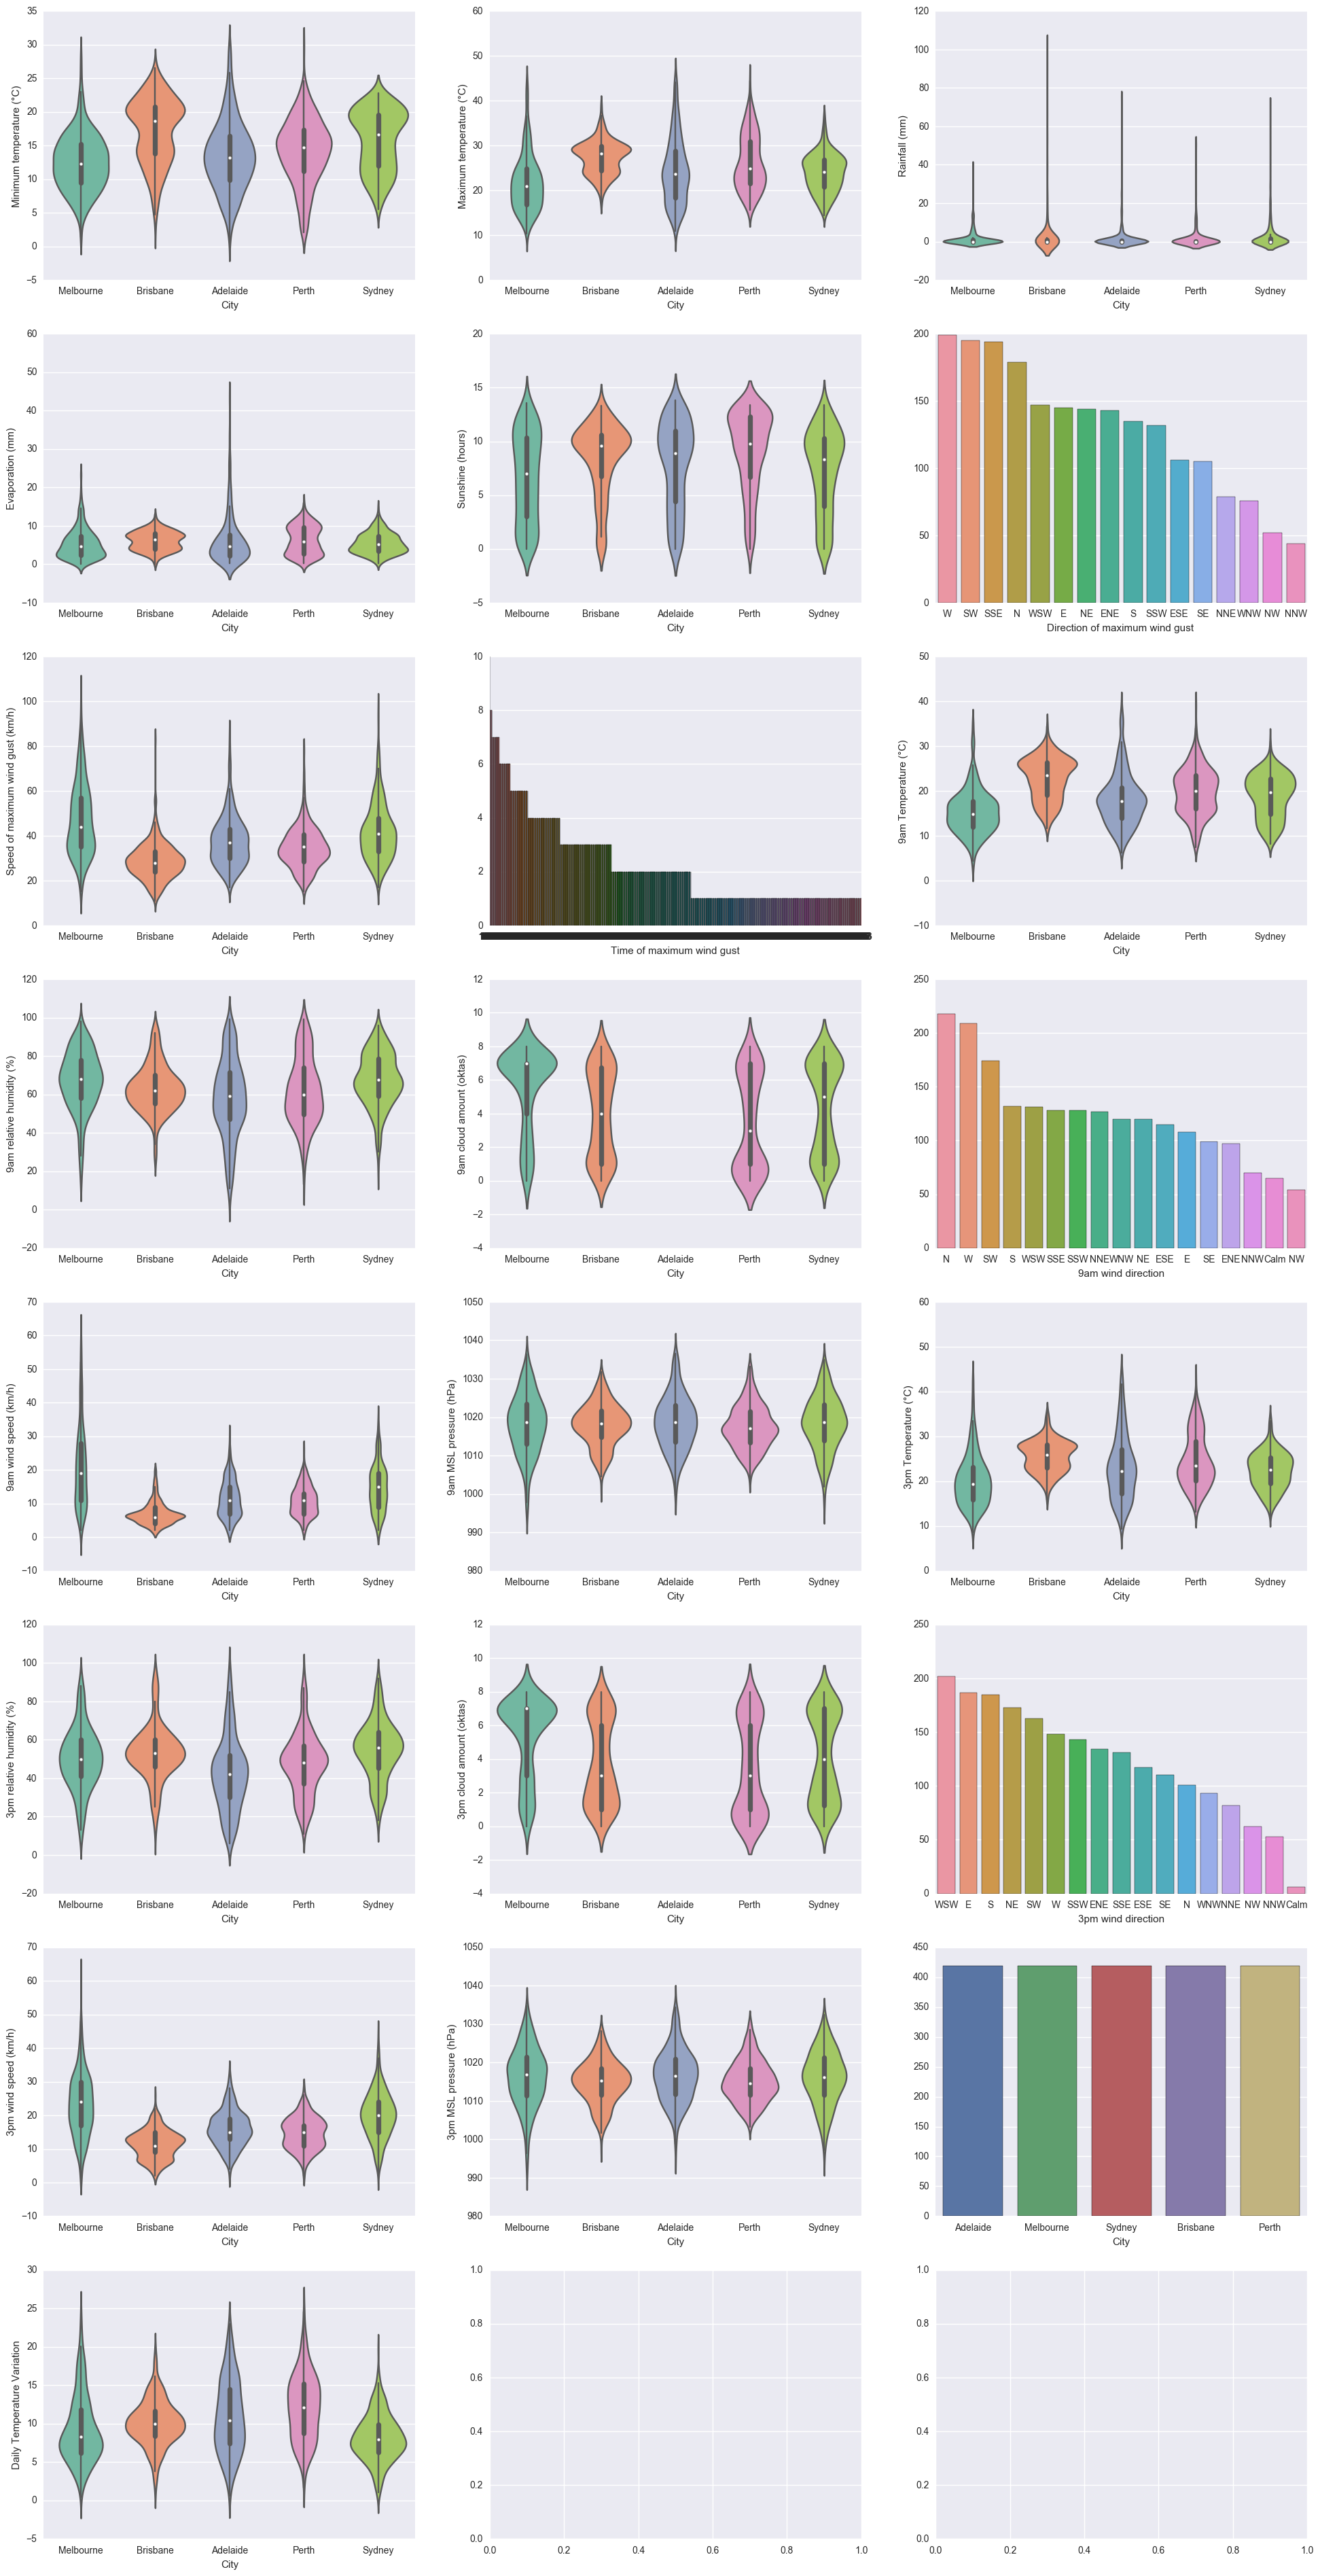

In [205]:
plot_dists(df, df.columns)

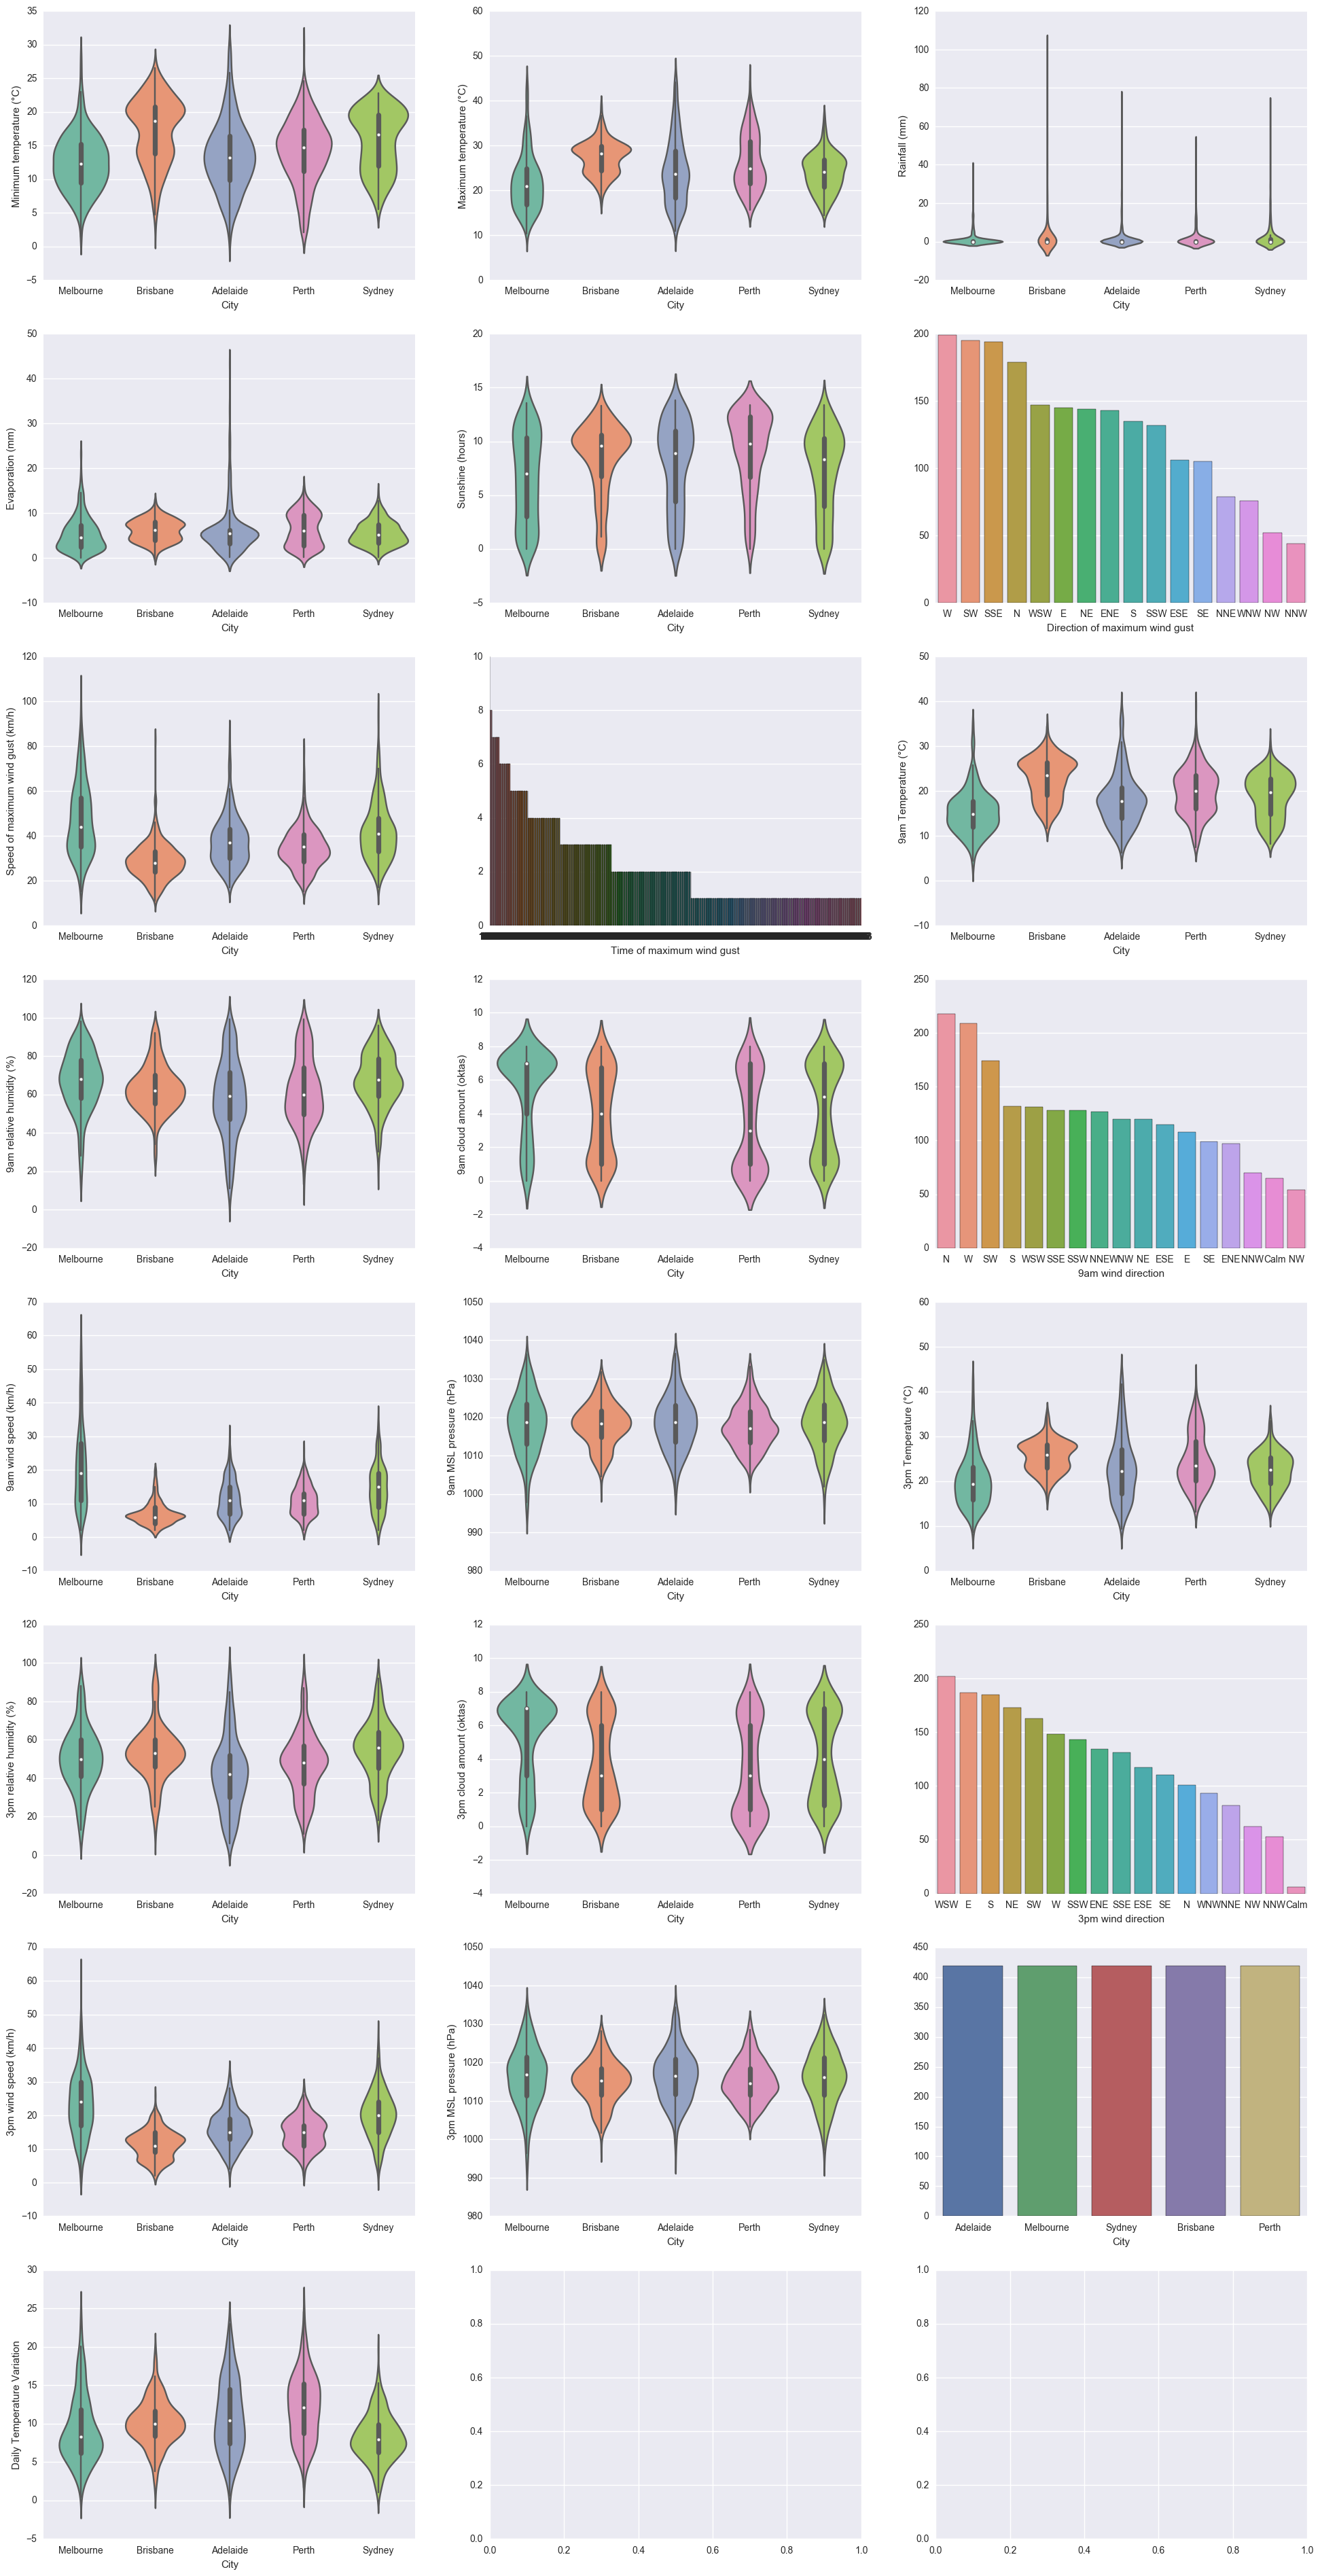

In [216]:
plot_dists(df, df.columns)

##  Fill NaNs

In [210]:
#IsNan Cols#IsNan C 
p = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
p = p[p > 0]
p

3pm cloud amount (oktas)             0.309308
9am cloud amount (oktas)             0.291647
9am wind speed (km/h)                0.031026
3pm relative humidity (%)            0.027208
3pm Temperature (°C)                 0.026730
Daily Temperature Variation          0.026730
Maximum temperature (°C)             0.026253
3pm MSL pressure (hPa)               0.025298
Sunshine (hours)                     0.024821
9am relative humidity (%)            0.023866
9am Temperature (°C)                 0.023866
9am MSL pressure (hPa)               0.023389
Minimum temperature (°C)             0.023389
Speed of maximum wind gust (km/h)    0.009547
Direction of maximum wind gust       0.009547
Time of maximum wind gust            0.008115
3pm wind speed (km/h)                0.005251
3pm wind direction                   0.002387
dtype: float64

In [207]:
#df["Evaporation (mm)"]

In [214]:
#Fill Zeros#
zeroCols = [u"Rainfall (mm)"]
for col in zeroCols:
    df[col] = df[col].fillna(0)

In [215]:
#Fill Median/Mode
medCols = ["Evaporation (mm)"]
for col in medCols:
    if df[col].dtype != object:
        df[col] = df[col].fillna(df[col].median())
        df[col] = df.groupby("City")[col].transform(lambda x: x.fillna(x.mean()))
    else:
        df[col] = df[col].fillna(df[col].mode()[0])